In [1]:
import matplotlib.pyplot as plt
from pydicom import dcmread
import nibabel as nib
import numpy as np
import cv2
import os

# .dcm files

#### Load full tomography

In [ ]:
BASE_PATH = '3000566.000000-NA-03192'
ds = dcmread(f'{BASE_PATH}/1-127.dcm')
body = np.array([dcmread(f'{BASE_PATH}/1-{i:03d}.dcm').pixel_array for i in range(1,134)])
body.shape

#### MIP (by amax's axis)

In [ ]:
plt.imshow(np.amax(body, axis=2), cmap="gray", extent=[-1,1,-1,1])

#### MIP (by transposing)

In [ ]:
transposed = np.transpose(body, axes=(2, 0, 1))
selected_slices = transposed[230:260]
mip = np.amax(selected_slices, axis=0)
image_size = (int(mip.shape[0]*2), int(mip.shape[1]*0.6))
mip_stretched = cv2.resize(mip, dsize=image_size)
plt.imshow(mip_stretched, cmap="gray")
plt.imsave('mip.jpeg', mip_stretched, cmap="gray")


# .nii files

In [2]:
import verse.utils.data_utilities as dutils
import verse.utils.eval_utilities as eutils
import nibabel.orientations as nio

In [3]:
directory = '/home/pedrofrancescon/Desktop/TCC/'

# img_nib = nib.load(os.path.join(directory, 'images/rawdata/sub-gl216/sub-gl216_dir-ax_ct.nii.gz'))
img_nib = nib.load(os.path.join(directory, 'images/rawdata/sub-verse502/sub-verse502_dir-iso_ct.nii.gz'))
# img_nib = nib.load(os.path.join(directory, 'images/rawdata/sub-verse509/sub-verse509_dir-iso_ct.nii.gz'))
# img_nib = nib.load(os.path.join(directory, 'images/rawdata/sub-verse512/sub-verse512_dir-iso_ct.nii.gz'))
# img_nib = nib.load(os.path.join(directory, 'images/rawdata/sub-verse810/sub-verse810_dir-iso_ct.nii.gz'))
img_arr = np.asanyarray(img_nib.dataobj)
img_arr.shape

(512, 512, 1119)

In [6]:
ctd_list = dutils.load_centroids(os.path.join(directory,'container/data/results/sub-verse502/sub-verse502_dir-iso_ct_ctd.json'))
# ctd_list = dutils.load_centroids(os.path.join(directory,'container/data/results/sub-verse509/sub-verse509_dir-iso_ct_ctd.json'))
# ctd_list = dutils.load_centroids(os.path.join(directory,'results/sub-verse512/sub-verse512_dir-iso_ct_ctd.json'))

# ctd_list = dutils.load_centroids('/home/pedrofrancescon/Desktop/TCC/images/derivatives/sub-verse502/sub-verse502_dir-iso_seg-subreg_ctd.json')
# ctd_list = dutils.load_centroids('/home/pedrofrancescon/Desktop/TCC/images/derivatives/sub-verse509/sub-verse509_dir-iso_seg-subreg_ctd.json')
# ctd_list = dutils.load_centroids('/home/pedrofrancescon/Desktop/TCC/images/derivatives/sub-verse512/sub-verse512_dir-iso_seg-subreg_ctd.json')
ctd_list

[('L', 'A', 'S'),
 [8, 292.9679375, 249.77912500000002, 1096.89530146538],
 [9, 293.11946875, 246.52603125000002, 1068.2553693351997],
 [10, 293.71909375, 241.58884375000002, 1037.1621291970362],
 [11, 294.2014375, 235.81546874999998, 1005.3599657471989],
 [12, 294.2556875, 230.03368749999998, 973.0875264371424],
 [13, 294.07759375, 225.83078124999997, 935.8984003107389],
 [14, 294.54621875, 223.3735625, 896.6474049628812],
 [15, 295.245375, 223.383875, 858.0553858258173],
 [16, 296.4065, 224.19650000000001, 820.1148152305756],
 [17, 298.0256875, 224.80506250000002, 782.1583754953394],
 [18, 300.2284375, 224.9615, 739.0018423794968],
 [19, 302.569875, 227.9528125, 691.6292042879579],
 [20, 303.38284375, 232.68559375, 641.2969715874603],
 [21, 303.47309375, 240.43525, 589.8733794739493],
 [22, 304.22271875, 248.36978125000002, 537.5325307237097],
 [23, 304.78575, 255.88634374999998, 483.05224724403035],
 [24, 306.49875, 256.4204375, 429.42304812180805],
 [25, 309.59784375, 244.014437499

#### MIP (by amax's axis)

In [ ]:
plt.imshow(np.amax(img_arr, axis=1), cmap="gray")
# plt.imshow(np.amax(np.rot90(img_arr, 1, axes=[1,2]), axis=0), cmap="gray")
# plt.imshow(np.amax(np.rot90(img_arr, 1, axes=[1,2]), axis=0), cmap="gray", extent=[0,1,0,1])

[*] Image resampled to voxel size: (1, 1, 1)
[*] Rescaled centroid coordinates to spacing (x, y, z) = (1, 1, 1) mm
img zooms = (1.0, 1.0, 1.0)
img orientation code: ('I', 'P', 'L')
new centroids: [('I', 'P', 'L'), [8, 15.3, 246.0, 284.5], [9, 33.0, 248.6, 284.8], [10, 51.7, 252.8, 284.9], [11, 70.5, 258.3, 285.9], [12, 90.0, 264.2, 286.0], [13, 110.5, 269.4, 285.3], [14, 132.1, 272.1, 285.2], [15, 154.8, 272.6, 286.0], [16, 178.0, 271.6, 286.8], [17, 202.0, 271.8, 288.8], [18, 227.8, 272.9, 291.3], [19, 255.2, 271.0, 293.1], [20, 284.2, 265.1, 293.7], [21, 314.4, 255.9, 293.5], [22, 346.4, 247.9, 294.5], [23, 380.5, 241.0, 295.8], [24, 415.3, 240.6, 297.9]]


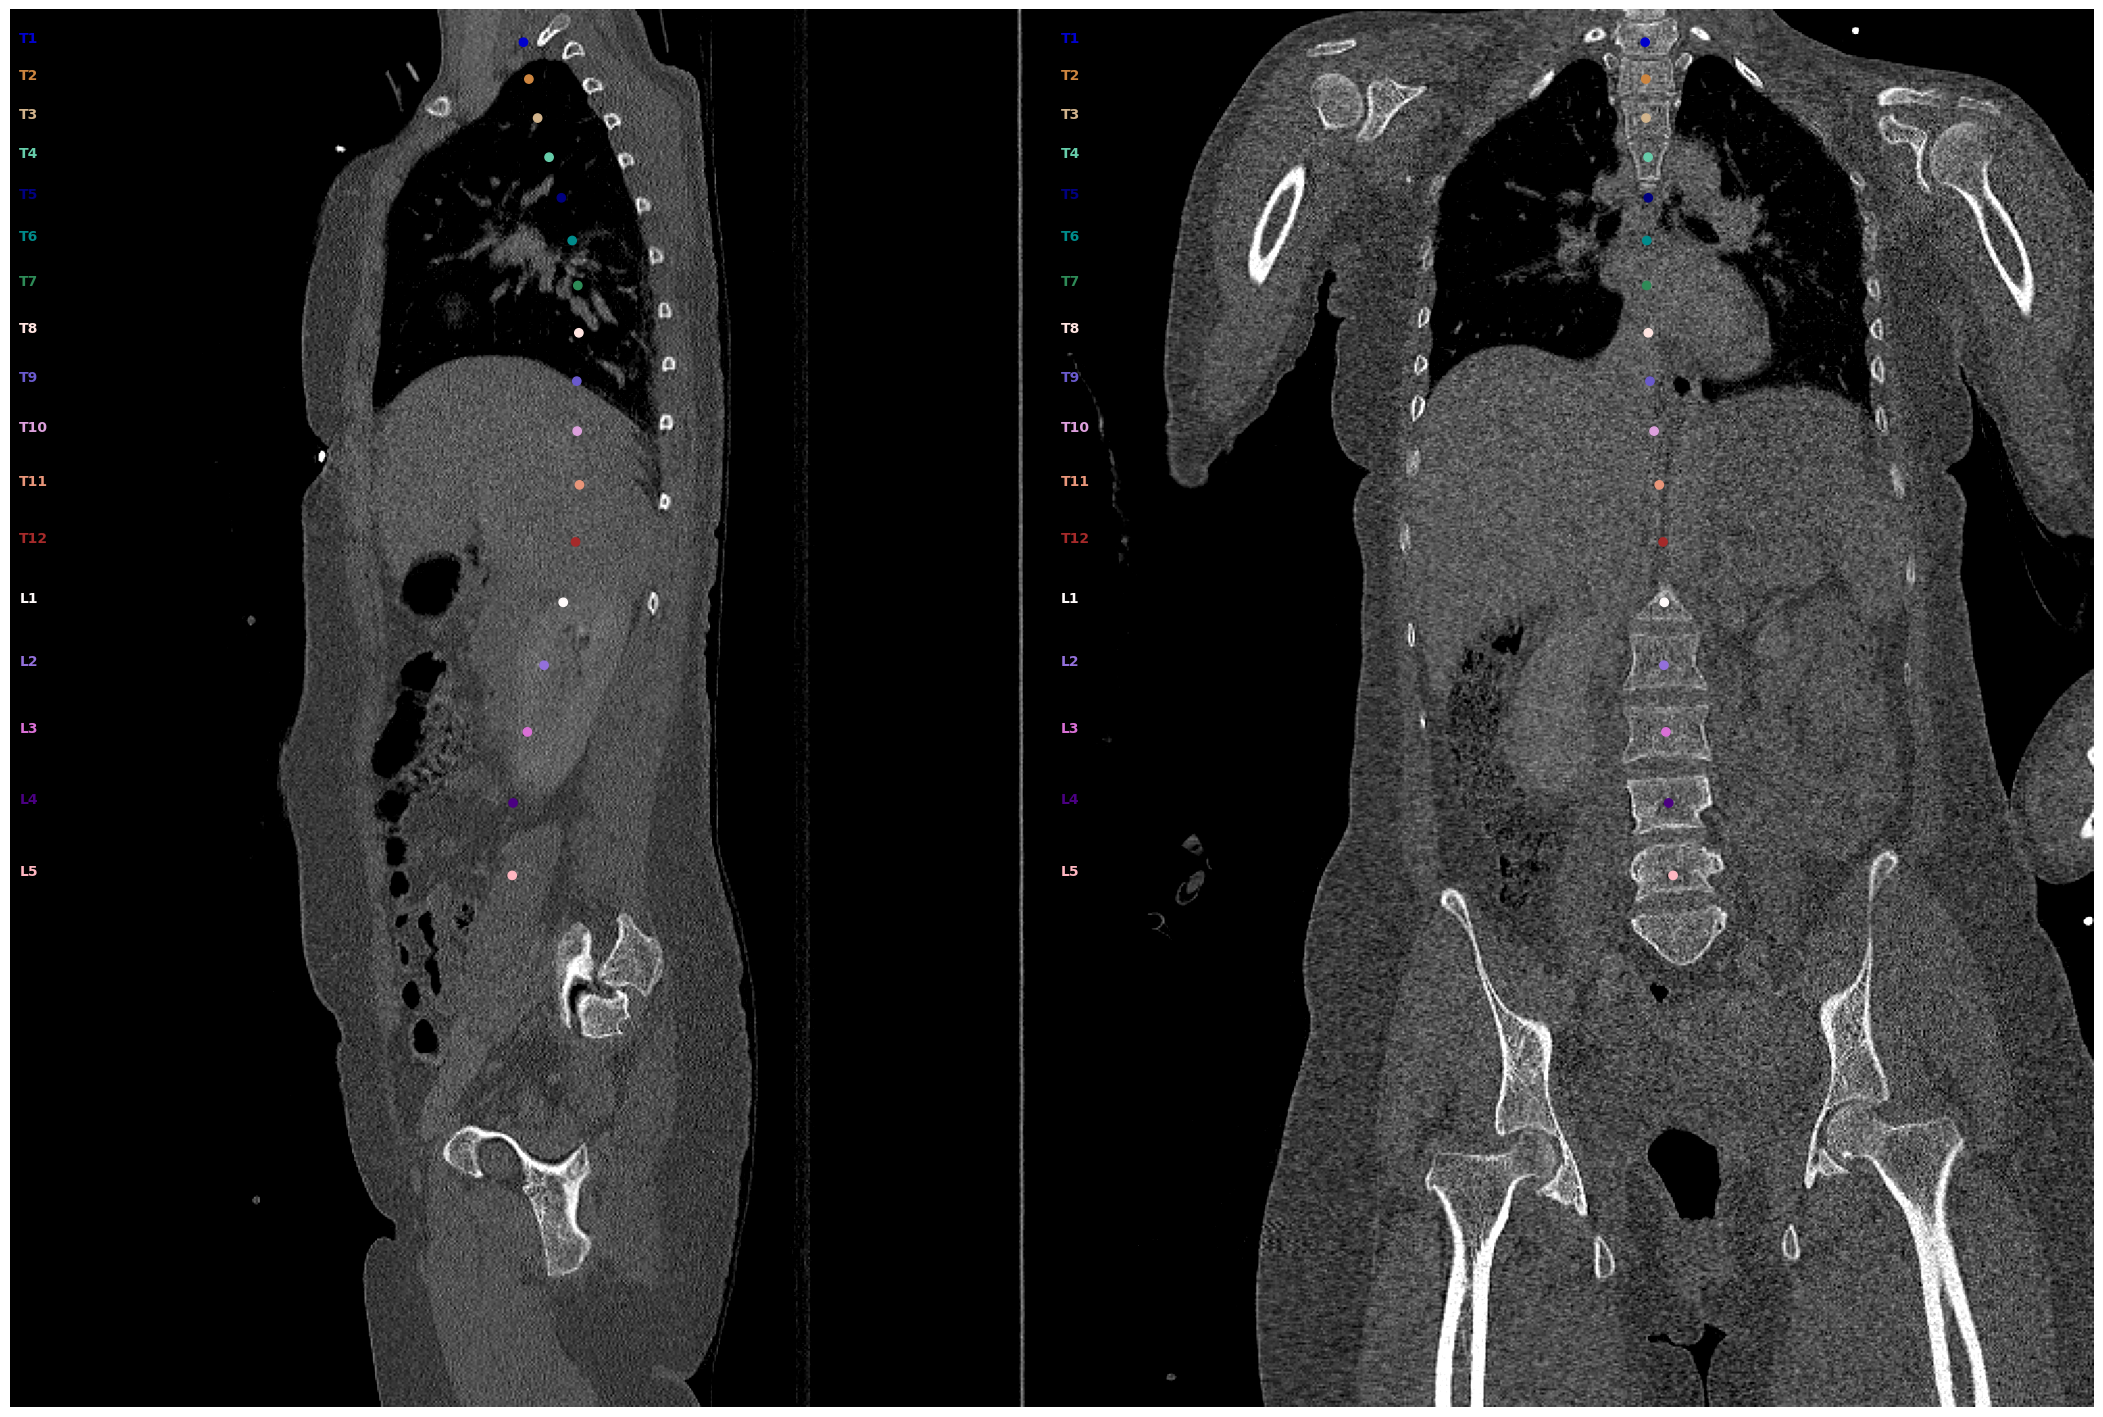

In [5]:
img_iso = dutils.resample_nib(img_nib, voxel_spacing=(1, 1, 1), order=3)
ctd_iso = dutils.rescale_centroids(ctd_list, img_nib, (1,1,1))

img_iso = dutils.reorient_to(img_iso, axcodes_to=('I', 'P', 'L'))
ctd_iso = dutils.reorient_centroids_to(ctd_iso, img_iso)

#check img zooms 
zooms = img_iso.header.get_zooms()
print('img zooms = {}'.format(zooms))

#check img orientation
axs_code = nio.ornt2axcodes(nio.io_orientation(img_iso.affine))
print('img orientation code: {}'.format(axs_code))

#check centroids
print('new centroids: {}'.format(ctd_iso))

im_np  = img_iso.get_fdata()

im_np_sag = im_np[:,:,int(im_np.shape[2]/2)]
im_np_cor = im_np[:,int(im_np.shape[1]/2),:]

fig, axs = dutils.create_figure(96,im_np_sag, im_np_cor)
axs[0].imshow(im_np_sag, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
dutils.plot_sag_centroids(axs[0], ctd_iso, zooms)

axs[1].imshow(im_np_cor, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
dutils.plot_cor_centroids(axs[1], ctd_iso, zooms)

[*] Image resampled to voxel size: (1, 1, 1)
[*] Rescaled centroid coordinates to spacing (x, y, z) = (1, 1, 1) mm
img zooms = (1.0, 1.0, 1.0)
img orientation code: ('I', 'P', 'L')
new centroids: [('I', 'P', 'L'), [8, 12.9, 256.1, 286.1], [9, 30.0, 259.3, 286.2], [10, 48.7, 264.1, 286.8], [11, 67.8, 269.7, 287.3], [12, 87.1, 275.4, 287.4], [13, 109.5, 279.5, 287.2], [14, 133.0, 281.9, 287.6], [15, 156.2, 281.9, 288.3], [16, 178.9, 281.1, 289.5], [17, 201.7, 280.5, 291.0], [18, 227.6, 280.3, 293.2], [19, 256.0, 277.4, 295.5], [20, 286.2, 272.8, 296.3], [21, 317.1, 265.2, 296.4], [22, 348.5, 257.5, 297.1], [23, 381.2, 250.1, 297.6], [24, 413.3, 249.6, 299.3], [25, 439.3, 261.7, 302.3]]


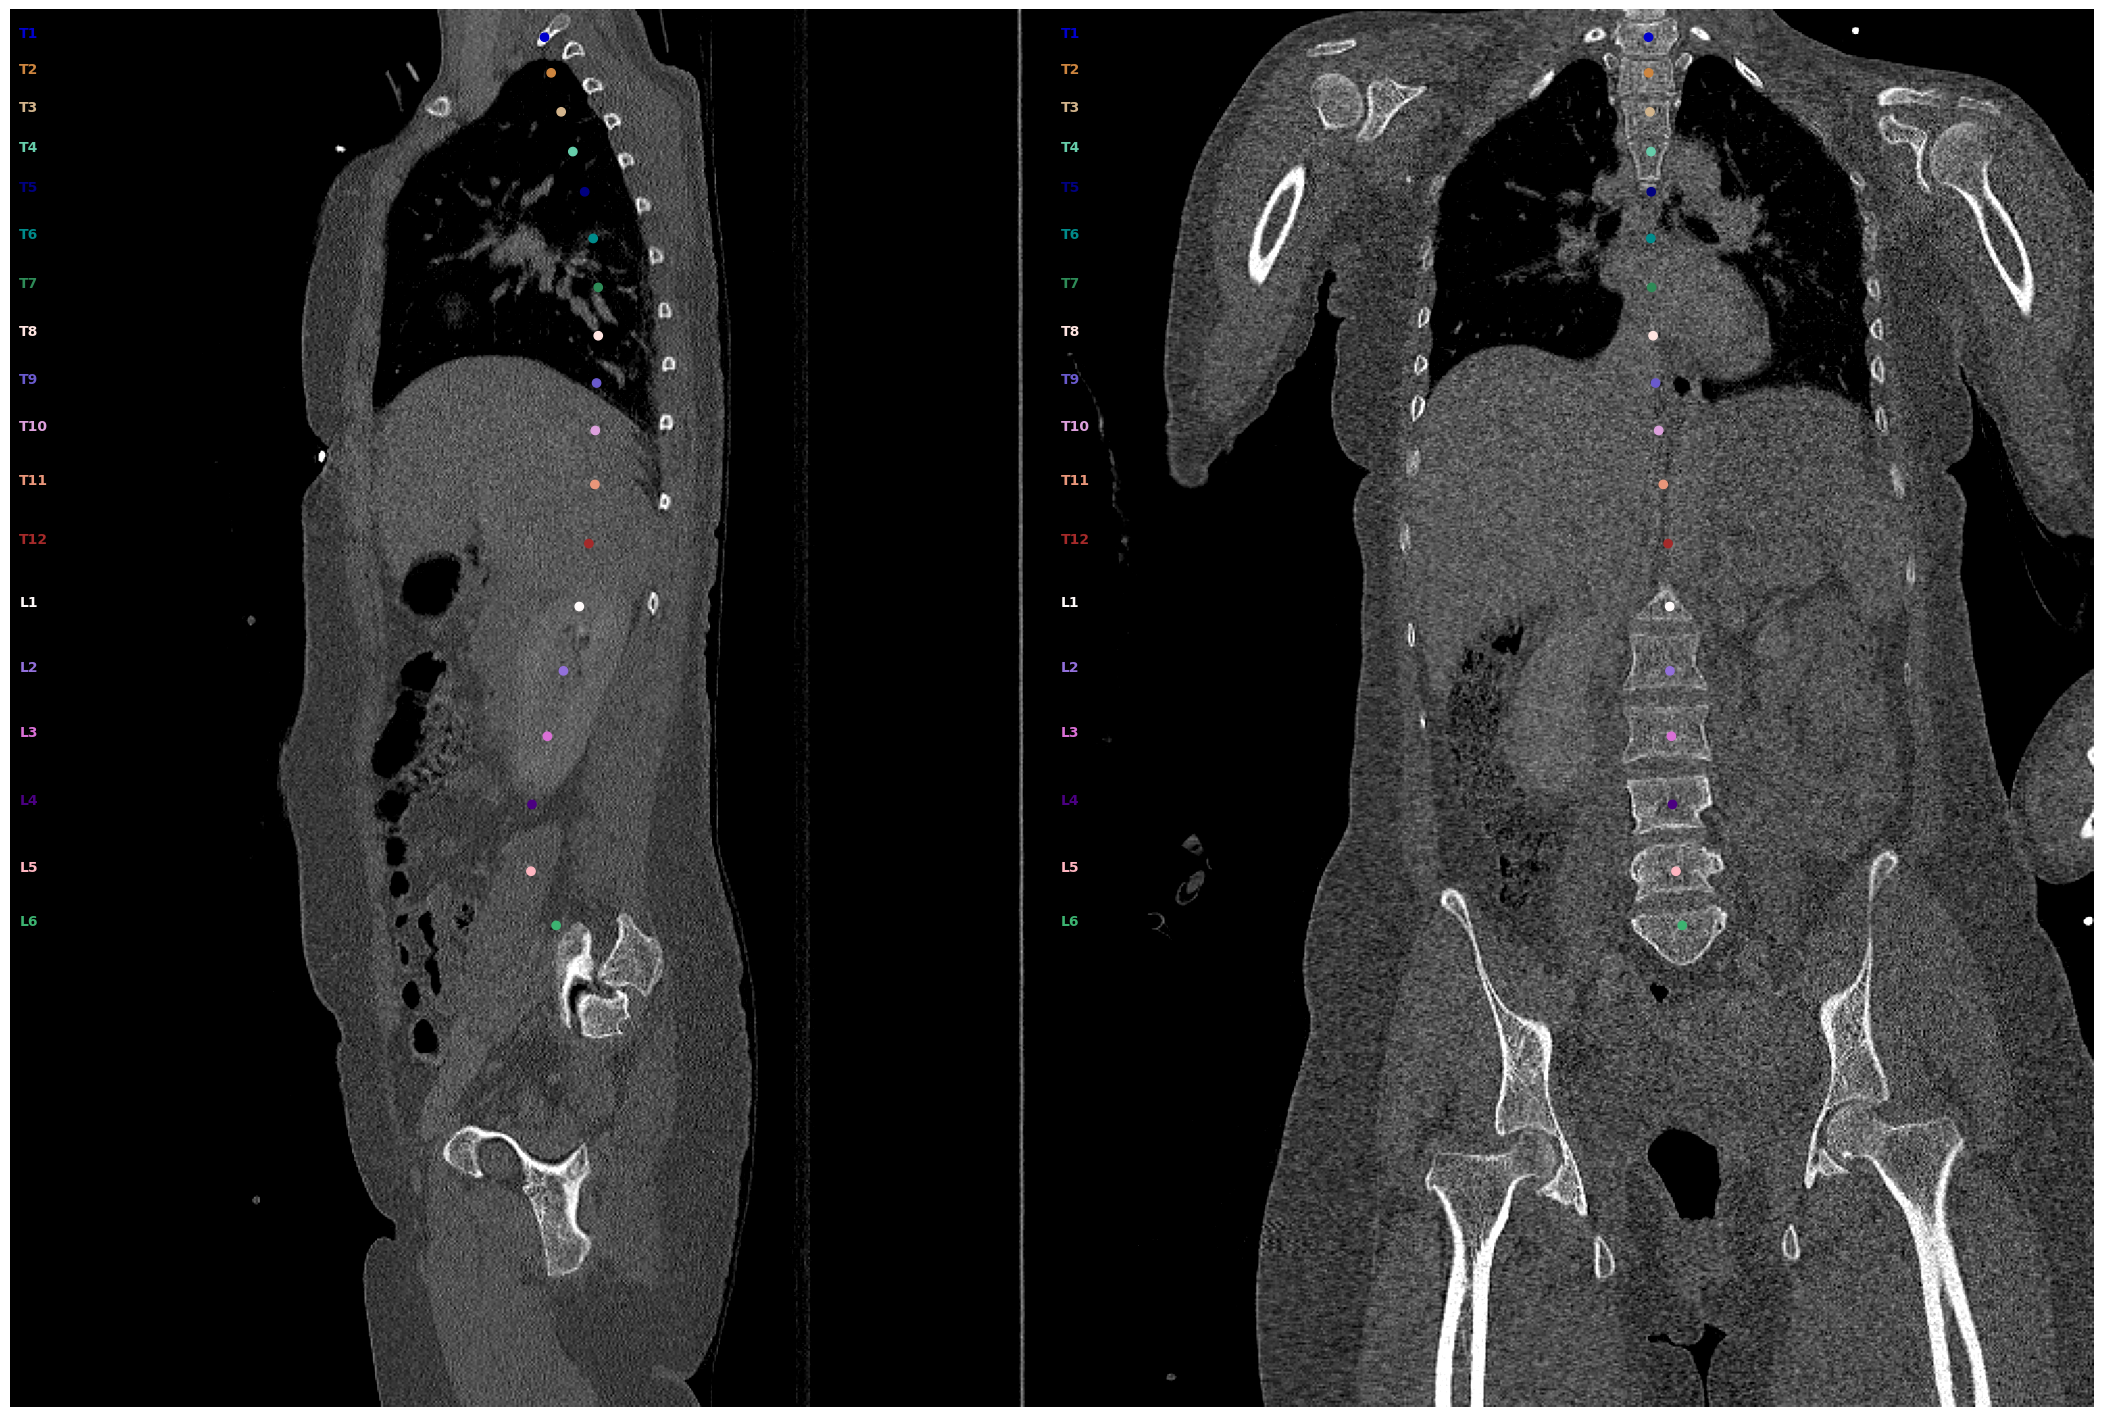

In [7]:
img_iso = dutils.resample_nib(img_nib, voxel_spacing=(1, 1, 1), order=3)
ctd_iso = dutils.rescale_centroids(ctd_list, img_nib, (1,1,1))

img_iso = dutils.reorient_to(img_iso, axcodes_to=('I', 'P', 'L'))
ctd_iso = dutils.reorient_centroids_to(ctd_iso, img_iso)

#check img zooms 
zooms = img_iso.header.get_zooms()
print('img zooms = {}'.format(zooms))

#check img orientation
axs_code = nio.ornt2axcodes(nio.io_orientation(img_iso.affine))
print('img orientation code: {}'.format(axs_code))

#check centroids
print('new centroids: {}'.format(ctd_iso))

im_np  = img_iso.get_fdata()

im_np_sag = im_np[:,:,int(im_np.shape[2]/2)]
im_np_cor = im_np[:,int(im_np.shape[1]/2),:]

fig, axs = dutils.create_figure(96,im_np_sag, im_np_cor)
axs[0].imshow(im_np_sag, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
dutils.plot_sag_centroids(axs[0], ctd_iso, zooms)

axs[1].imshow(im_np_cor, cmap=plt.cm.gray, norm=dutils.wdw_sbone)
dutils.plot_cor_centroids(axs[1], ctd_iso, zooms)

In [ ]:
final = nib.load(os.path.join(directory, 'dataset/results/sub-verse512/sub-verse512_dir-iso_ct_seg.nii.gz'))
final = np.asanyarray(final.dataobj)

preprocessed = nib.load(os.path.join(directory, 'dataset/tmp/sub-verse512/data_preprocessed/sub-verse512_dir-iso_ct.nii.gz'))
preprocessed = np.asanyarray(preprocessed.dataobj)